<a href="https://colab.research.google.com/github/Hyunseo-BA/BigData_Lab/blob/master/dnn_mnist_classification_encoding%26no_flatten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Tue Jul 28 00:25:10 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.51.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


#### 쉬운 버전과 달리 데이터의 구조를 변형시켜 3차원을 2차원으로 축소


In [3]:
# 기존의 shape (x0000, 28, 28)
train_images = train_images.reshape((60000, 28*28))
test_images = test_images.reshape((10000, 28*28))

In [4]:
train_labels[0]

5

### One-Hot Encoding

##### 카테고리 종류 갯수만큼 0배열을 만듬. ex) 3종류의 범주를 갖는 경우 [ 0, 0, 0 ] 
##### 이후에 카테고리에 해당하는 순서의 0을 1로 바꿈. ex) 라벨이 0에 해당하면 [1, 0, 0]


In [ ]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
print(train_images.shape,
      train_labels.shape,
      test_images.shape,
      test_labels.shape)

(60000, 784) (60000, 10) (10000, 784) (10000, 10)


In [ ]:
# to_catergorical 이전엔 5
# 원핫인코딩 처리 후 변형된 값
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
from tensorflow.keras import models, layers

# 이미 1축으로 이루어진 이미지 픽셀이므로 Flatten레이어 불필요
model = models.Sequential()
model.add(layers.Dense(input_shape=(28*28, ) ,units=512, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))

In [ ]:
model.summary()
# output shape : 레이어의 노드(퍼셉트론)의 갯수
# Param # : 레이어의 엣지의 갯수
# flatten : 1차원 축으로 쭉 펼침
# Total params : 찾아야 하는 모든 가중치의 개수

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(x=train_images, y=train_labels,
                    epochs=30,
                    batch_size=100,
                    validation_split = 0.2)

Epoch 1/30
480/480 [==============================] - 1s 3ms/step - loss: 5.8527 - accuracy: 0.8929 - val_loss: 1.1726 - val_accuracy: 0.9331
Epoch 2/30
480/480 [==============================] - 1s 3ms/step - loss: 0.7707 - accuracy: 0.9496 - val_loss: 0.8738 - val_accuracy: 0.9469
Epoch 3/30
480/480 [==============================] - 1s 3ms/step - loss: 0.5259 - accuracy: 0.9632 - val_loss: 0.7245 - val_accuracy: 0.9567
Epoch 4/30
480/480 [==============================] - 1s 3ms/step - loss: 0.4232 - accuracy: 0.9707 - val_loss: 0.7694 - val_accuracy: 0.9642
Epoch 5/30
480/480 [==============================] - 1s 3ms/step - loss: 0.3787 - accuracy: 0.9743 - val_loss: 0.7681 - val_accuracy: 0.9667
Epoch 6/30
480/480 [==============================] - 1s 3ms/step - loss: 0.3059 - accuracy: 0.9791 - val_loss: 0.7902 - val_accuracy: 0.9661
Epoch 7/30
480/480 [==============================] - 1s 3ms/step - loss: 0.2989 - accuracy: 0.9807 - val_loss: 0.8086 - val_accuracy: 0.9682
Epoch 

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

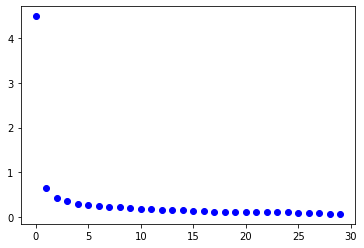

In [ ]:
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 1.2593 - accuracy: 0.9765


In [ ]:
import numpy as np

predict = model.predict(test_images[0].reshape((1, 28*28)))
print(predict, np.argmax(predict))

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]] 7
